# Project Goal:
## Predict the total number of bikes peopled rented in a given hour
### Predict the cnt column using all of theother columns, except for casual and registered.

# Dictionary:
### instant - A unique sequential ID number for each row
### dteday - The date of the rentals
### season - The season in which the rentals occurred
### yr - The year the rentals occurred
### mnth - The month the rentals occurred
### hr - The hour the rentals occurred
### holiday - Whether or not the day was a holiday
### weekday - The day of the week (as a number, 0 to 7)
### workingday - Whether or not the day was a working day
### weathersit - The weather (as a categorical variable)
### temp - The temperature, on a 0-1 scale
### atemp - The adjusted temperature
### hum - The humidity, on a 0-1 scale
### windspeed - The wind speed, on a 0-1 scale
### casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
### registered - The number of registered riders (people who had already signed up)
### cnt - The total number of bike rentals (casual + registered)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline

In [18]:
df = pd.read_csv('bike_rental_hour.csv')
df['cnt'].head(5)

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

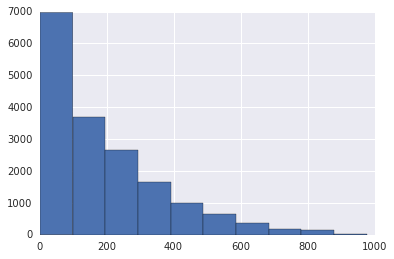

In [19]:
plt.hist(df['cnt'])
plt.show()

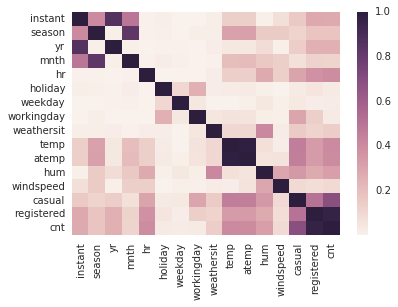

In [20]:
corr_matrix = df.corr().abs()
sn.heatmap(corr_matrix)

In [21]:
# delete atemp or temp
# delete casual and registered
df[['atemp','temp']]

,atemp,temp
0,0.2879,0.24
1,0.2727,0.22
2,0.2727,0.22
3,0.2879,0.24
4,0.2879,0.24
5,0.2576,0.24
6,0.2727,0.22
7,0.2576,0.20
8,0.2879,0.24
9,0.3485,0.32


In [22]:
def assign_label(hour):
    if hour >= 0 and hour < 6:
        return 1
    elif hour >= 6 and hour < 12:
        return 2
    elif hour >= 12 and hour < 18:
        return 3
    else: 
        return 4
    
    return
df['time_label'] = df['hr'].apply(assign_label)
df.shape

(17379, 18)

# First Model: Linear Regression
## Error: 140


In [23]:
train = df.sample(frac =.80,random_state=1)
test = df.loc[~df.index.isin(train.index)]

columns = ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed']
train = train.drop(labels=['casual','dteday','registered','atemp'],axis=1)
test = test.drop(labels=['casual','dteday','registered','atemp'],axis=1)

In [24]:
lr = LinearRegression()
model = lr.fit(train[columns],train['cnt'])
predictions = model.predict(test[columns])
rmse = np.sqrt(mean_squared_error(predictions,test['cnt']))
rmse

140.07605053147591

# Model 2: Decision Tree
## Error: 50

In [25]:
reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(train[columns], train["cnt"])
prediction = reg.predict(test[columns])
rmse = np.sqrt(mean_squared_error(prediction,test['cnt']))

# Model 3: Random Forest Tree
## Error: 4


In [26]:
reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[columns],train['cnt'])
prediction2 = reg.predict(test[columns])
rmse = np.sqrt(mean_squared_error(prediction2,test['cnt']))